/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

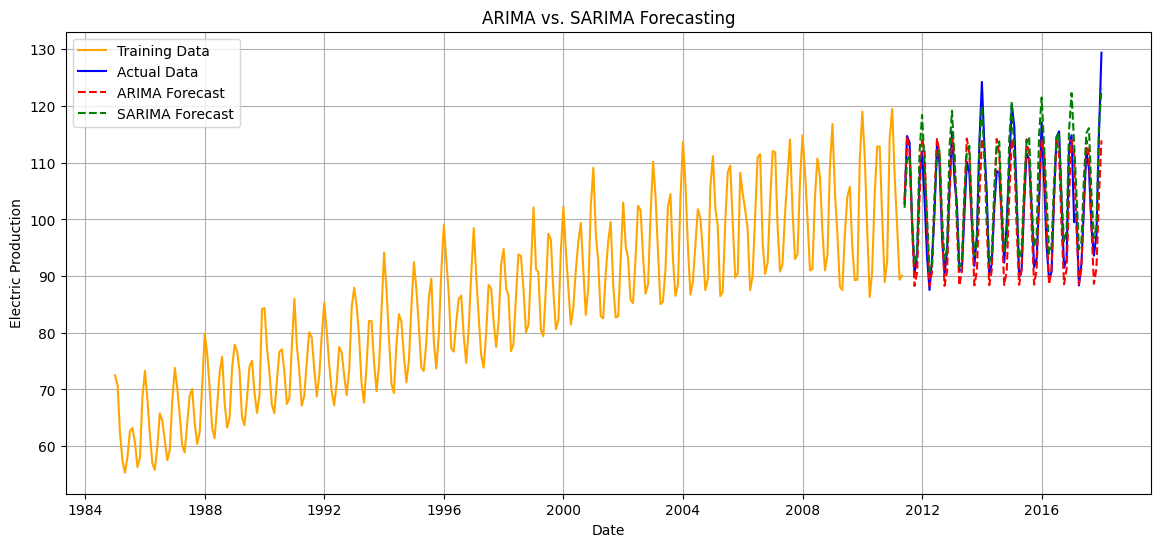

ARIMA MAE: 3.3288
SARIMA MAE: 3.4920


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Load dataset
file_path = '/content/Electric_Production.csv'
electric_data = pd.read_csv(file_path)

# Convert 'DATE' column to datetime and set as index
electric_data['DATE'] = pd.to_datetime(electric_data['DATE'])
electric_data.set_index('DATE', inplace=True)

# Split data into training (80%) and testing (20%) sets
train_size = int(len(electric_data) * 0.8)
train, test = electric_data.iloc[:train_size], electric_data.iloc[train_size:]

### 📈 ARIMA Model ###
# Automatically determine optimal (p, d, q) using AIC
p, d, q = 5, 1, 2  # Manually chosen (you can optimize using auto_arima)
arima_model = ARIMA(train, order=(p, d, q))
arima_result = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_result.forecast(steps=len(test))

# Compute MAE for ARIMA
arima_mae = mean_absolute_error(test, arima_forecast)

### 🌍 SARIMA Model (Seasonal ARIMA) ###
# Define SARIMA parameters (manually chosen)
P, D, Q, s = 1, 1, 1, 12  # Seasonal order with period=12 (monthly data)
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Forecast with SARIMA
sarima_forecast = sarima_result.forecast(steps=len(test))

# Compute MAE for SARIMA
sarima_mae = mean_absolute_error(test, sarima_forecast)

### 🔍 Visualization ###
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Training Data", color="orange")
plt.plot(test.index, test, label="Actual Data", color="blue")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", color="red", linestyle="dashed")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", color="green", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.title("ARIMA vs. SARIMA Forecasting")
plt.legend()
plt.grid(True)
plt.show()

### 📊 Print Errors ###
print(f"ARIMA MAE: {arima_mae:.4f}")
print(f"SARIMA MAE: {sarima_mae:.4f}")
